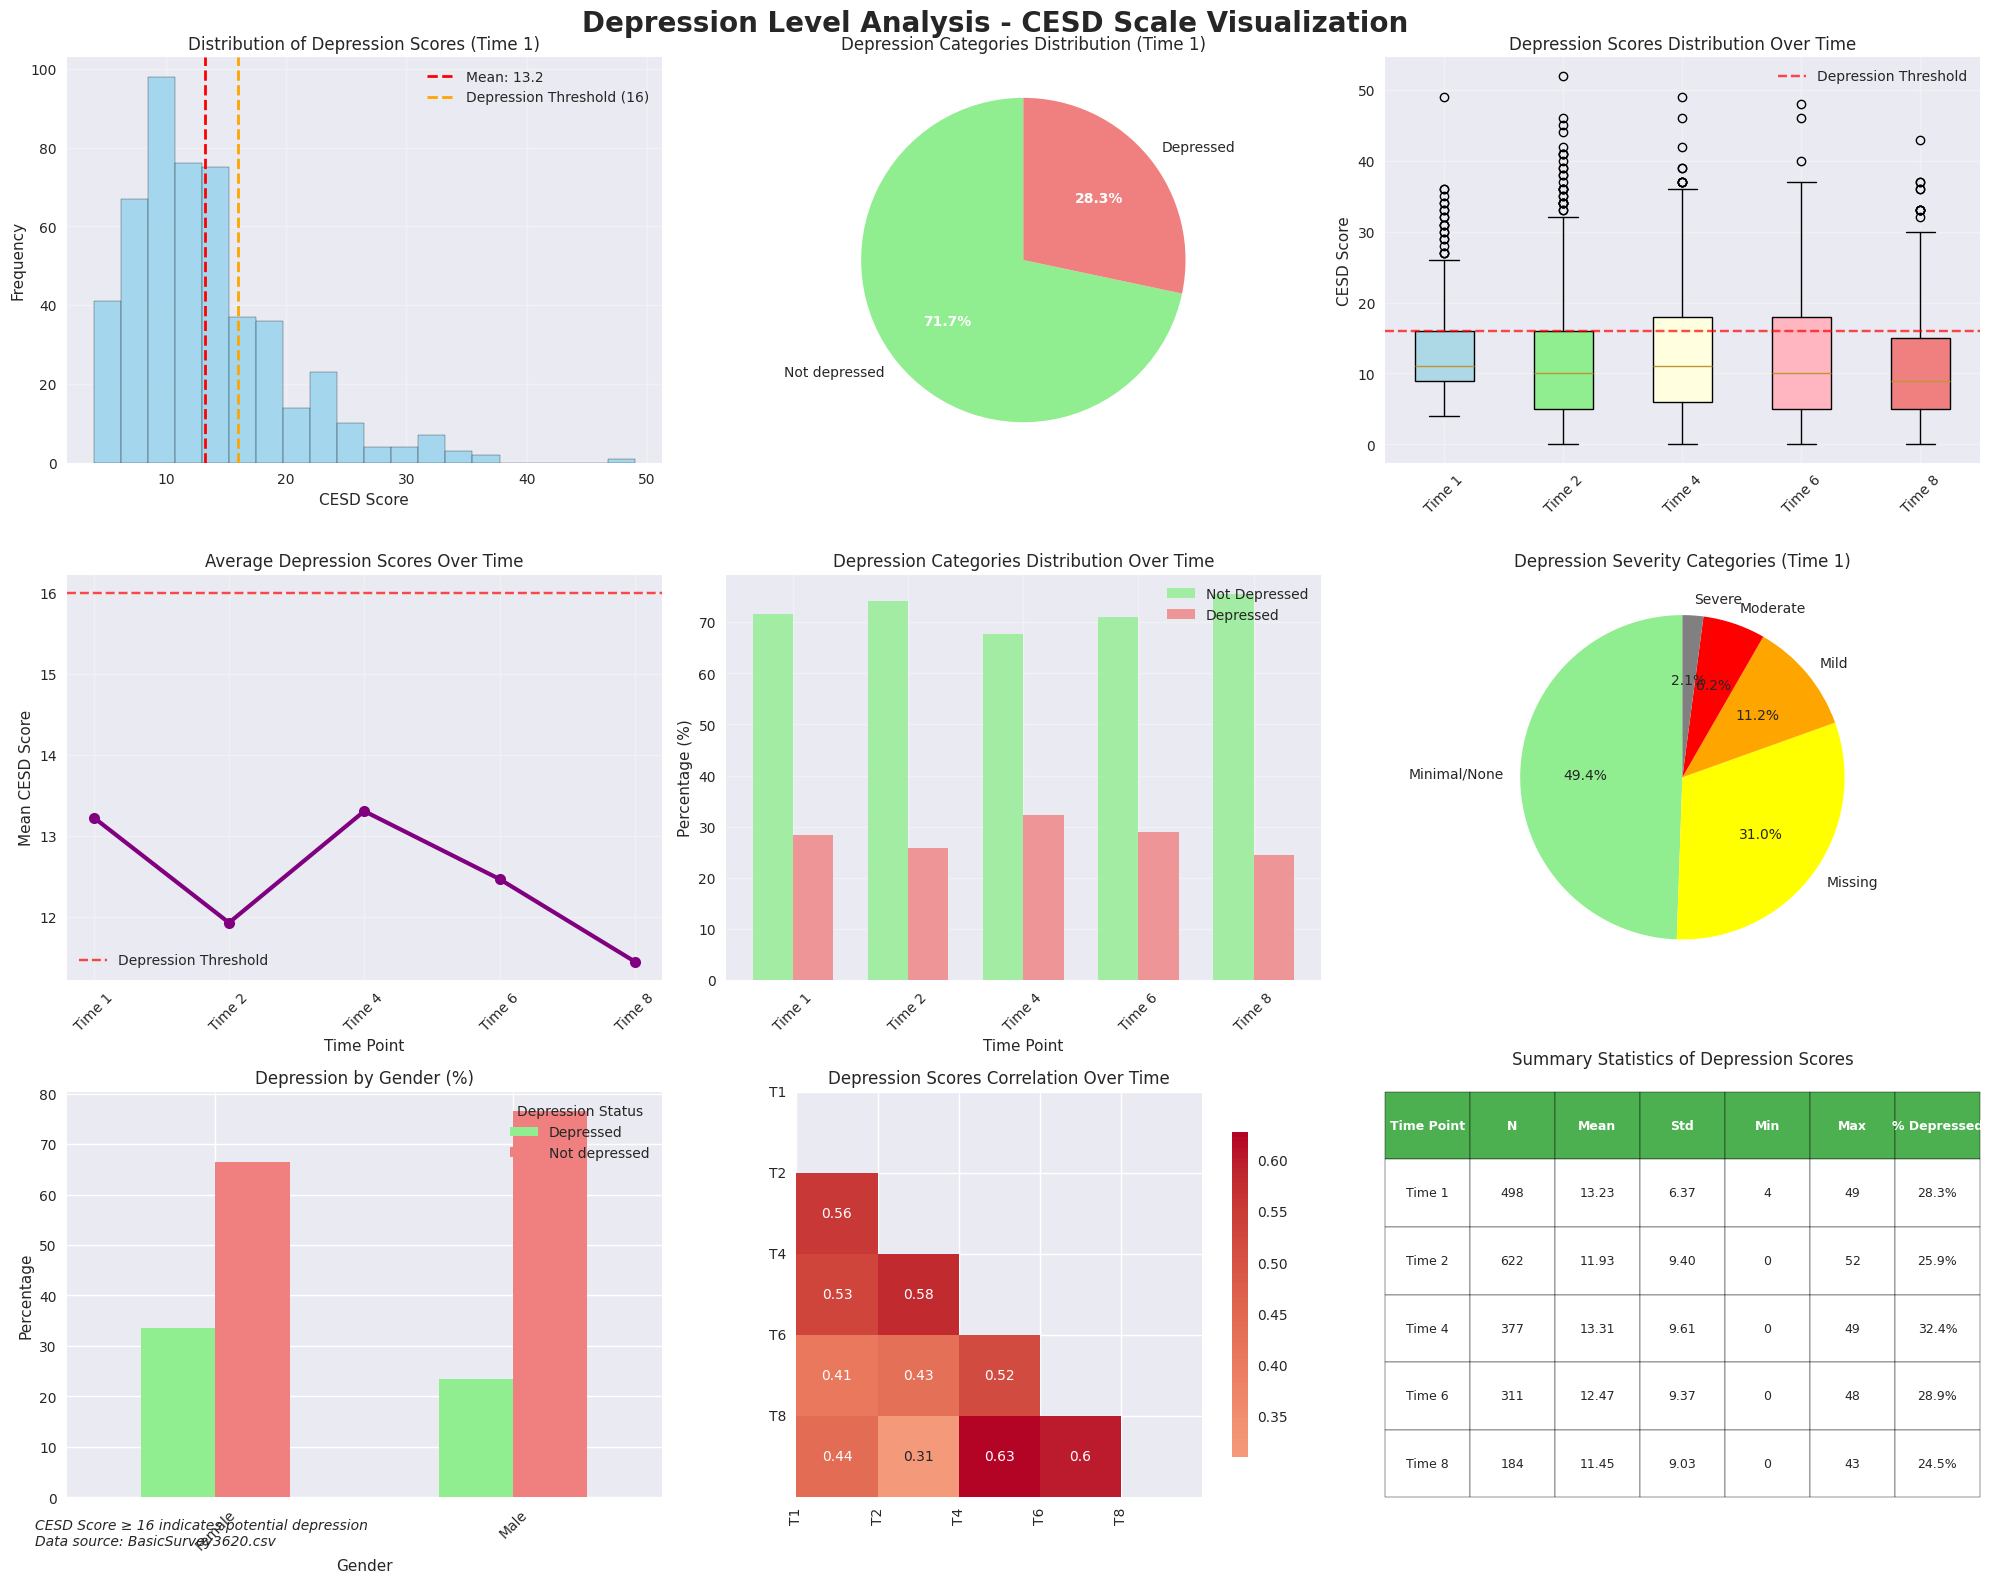


DEPRESSION ANALYSIS INSIGHTS
Total participants with depression data: 498
Average depression score: 13.23
Percentage meeting depression criteria (≥16): 28.3%

Depression Severity Distribution:
  Minimal/None: 357 (71.7%)
  Mild: 81 (16.3%)
  Moderate: 45 (9.0%)
  Severe: 15 (3.0%)

Depression Trends Over Time:
  Time 1: 28.3% depressed (n=498)
  Time 2: 25.9% depressed (n=622)
  Time 4: 32.4% depressed (n=377)
  Time 6: 28.9% depressed (n=311)
  Time 8: 24.5% depressed (n=184)



<Figure size 800x550 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/home/grealish/summer/KAN_NET/BasicSurvey(3-6-20).csv')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a comprehensive figure with multiple subplots
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Depression Level Analysis - CESD Scale Visualization', fontsize=20, fontweight='bold', y=0.98)

# Define CESD columns for different time points
cesd_overall_cols = ['CESDOverall_1', 'CESDOverall_2', 'CESDOverall_4', 'CESDOverall_6', 'CESDOverall_8']
cesd_group_cols = ['CESDGroup_1', 'CESDGroup_2', 'CESDGroup_4', 'CESDGroup_6', 'CESDGroup_8']
time_labels = ['Time 1', 'Time 2', 'Time 4', 'Time 6', 'Time 8']

# 1. Distribution of Depression Scores at Time Point 1
ax1 = plt.subplot(3, 3, 1)
cesd_scores = df['CESDOverall_1'].dropna()
plt.hist(cesd_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(cesd_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cesd_scores.mean():.1f}')
plt.axvline(16, color='orange', linestyle='--', linewidth=2, label='Depression Threshold (16)')
plt.xlabel('CESD Score')
plt.ylabel('Frequency')
plt.title('Distribution of Depression Scores (Time 1)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Depression Categories Distribution at Time Point 1
ax2 = plt.subplot(3, 3, 2)
depression_counts = df['CESDGroup_1'].value_counts()
colors = ['lightgreen', 'lightcoral']
wedges, texts, autotexts = plt.pie(depression_counts.values, labels=depression_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Depression Categories Distribution (Time 1)')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Depression Scores Over Time (Box Plot)
ax3 = plt.subplot(3, 3, 3)
time_data = []
time_labels_valid = []
for i, col in enumerate(cesd_overall_cols):
    scores = df[col].dropna()
    if len(scores) > 0:
        time_data.append(scores)
        time_labels_valid.append(time_labels[i])

box_plot = plt.boxplot(time_data, labels=time_labels_valid, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors[:len(box_plot['boxes'])]):
    patch.set_facecolor(color)
plt.axhline(16, color='red', linestyle='--', alpha=0.7, label='Depression Threshold')
plt.ylabel('CESD Score')
plt.title('Depression Scores Distribution Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Mean Depression Scores Over Time
ax4 = plt.subplot(3, 3, 4)
mean_scores = []
time_points = []
for i, col in enumerate(cesd_overall_cols):
    mean_score = df[col].mean()
    if not pd.isna(mean_score):
        mean_scores.append(mean_score)
        time_points.append(time_labels[i])

plt.plot(time_points, mean_scores, marker='o', linewidth=3, markersize=8, color='purple')
plt.axhline(16, color='red', linestyle='--', alpha=0.7, label='Depression Threshold')
plt.ylabel('Mean CESD Score')
plt.xlabel('Time Point')
plt.title('Average Depression Scores Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Depression Categories Comparison Across Time Points
ax5 = plt.subplot(3, 3, 5)
depression_data = []
not_depressed_data = []
time_points_cat = []

for i, col in enumerate(cesd_group_cols):
    counts = df[col].value_counts()
    if 'Depressed' in counts.index and 'Not depressed' in counts.index:
        total = counts.sum()
        depression_data.append(counts['Depressed'] / total * 100)
        not_depressed_data.append(counts['Not depressed'] / total * 100)
        time_points_cat.append(time_labels[i])

x = np.arange(len(time_points_cat))
width = 0.35

plt.bar(x - width/2, not_depressed_data, width, label='Not Depressed', color='lightgreen', alpha=0.8)
plt.bar(x + width/2, depression_data, width, label='Depressed', color='lightcoral', alpha=0.8)

plt.ylabel('Percentage (%)')
plt.xlabel('Time Point')
plt.title('Depression Categories Distribution Over Time')
plt.xticks(x, time_points_cat, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Depression Severity Categories
ax6 = plt.subplot(3, 3, 6)
def categorize_depression(score):
    if pd.isna(score):
        return 'Missing'
    elif score < 16:
        return 'Minimal/None'
    elif score < 21:
        return 'Mild'
    elif score < 30:
        return 'Moderate'
    else:
        return 'Severe'

severity_categories = df['CESDOverall_1'].apply(categorize_depression)
severity_counts = severity_categories.value_counts()

colors = ['lightgreen', 'yellow', 'orange', 'red', 'gray']
plt.pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', 
        colors=colors[:len(severity_counts)], startangle=90)
plt.title('Depression Severity Categories (Time 1)')

# 7. Gender and Depression Analysis (if gender data available)
ax7 = plt.subplot(3, 3, 7)
if 'gender_1' in df.columns:
    gender_depression = pd.crosstab(df['gender_1'], df['CESDGroup_1'], normalize='index') * 100
    gender_depression.plot(kind='bar', ax=ax7, color=['lightgreen', 'lightcoral'])
    plt.title('Depression by Gender (%)')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.legend(title='Depression Status')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'Gender data not available', ha='center', va='center', transform=ax7.transAxes)
    plt.title('Gender Analysis - Data Not Available')

# 8. Correlation Matrix of Depression Scores Over Time
ax8 = plt.subplot(3, 3, 8)
correlation_data = df[cesd_overall_cols].corr()
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Depression Scores Correlation Over Time')
plt.xticks(range(len(cesd_overall_cols)), ['T1', 'T2', 'T4', 'T6', 'T8'])
plt.yticks(range(len(cesd_overall_cols)), ['T1', 'T2', 'T4', 'T6', 'T8'])

# 9. Summary Statistics Table
ax9 = plt.subplot(3, 3, 9)
ax9.axis('tight')
ax9.axis('off')

# Create summary statistics
summary_stats = []
for i, col in enumerate(cesd_overall_cols):
    scores = df[col].dropna()
    if len(scores) > 0:
        stats = {
            'Time Point': time_labels[i],
            'N': len(scores),
            'Mean': f"{scores.mean():.2f}",
            'Std': f"{scores.std():.2f}",
            'Min': int(scores.min()),
            'Max': int(scores.max()),
            '% Depressed': f"{(scores >= 16).mean() * 100:.1f}%"
        }
        summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
table = ax9.table(cellText=summary_df.values, colLabels=summary_df.columns,
                  cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Style the table
for i in range(len(summary_df.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Summary Statistics of Depression Scores', pad=20)

# Add overall figure annotations
fig.text(0.02, 0.02, 'CESD Score ≥ 16 indicates potential depression\nData source: BasicSurvey3620.csv', 
         fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.05)
plt.show()
plt.savefig('my_plot.png') 

# Print additional insights
print("\n" + "="*60)
print("DEPRESSION ANALYSIS INSIGHTS")
print("="*60)

# Overall statistics
all_scores = df['CESDOverall_1'].dropna()
print(f"Total participants with depression data: {len(all_scores)}")
print(f"Average depression score: {all_scores.mean():.2f}")
print(f"Percentage meeting depression criteria (≥16): {(all_scores >= 16).mean()*100:.1f}%")

# Severity distribution
print(f"\nDepression Severity Distribution:")
severity_dist = df['CESDOverall_1'].apply(categorize_depression).value_counts()
for category, count in severity_dist.items():
    if category != 'Missing':
        percentage = (count / len(all_scores)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

# Time trend analysis
print(f"\nDepression Trends Over Time:")
for i, col in enumerate(cesd_overall_cols):
    scores = df[col].dropna()
    if len(scores) > 0:
        dep_rate = (scores >= 16).mean() * 100
        print(f"  {time_labels[i]}: {dep_rate:.1f}% depressed (n={len(scores)})")

print("\n" + "="*60)